In [1]:
import warnings; warnings.filterwarnings("ignore", message="Initializing zero-element tensors is a no-op")
import pandas as pd
import torch
import os 

from models.arcfaceresnet50 import ArcFaceResNet50
from eval_utils import eval_epoch
from utils import transform

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

IMAGES_PATH = './data/CASIA/casia-faces/'
DF_PATH = './data/CASIA/'
CHECKPOINTS_PATH = './checkpoints/'

In [9]:
# model = FaceResNet18(n_classes=97, emb_size=256).to(device)
# model.load_state_dict(torch.load(os.path.join(CHECKPOINTS_PATH, 'epoch_30.pt')))

# model = FaceResNet50().to(device)
# path = os.path.join(CHECKPOINTS_PATH, 'epoch_38_boa.pt')
# model = FaceResNet50.load_checkpoint(path)

# model = ArcFaceResNet50().to(device)
# path = os.path.join(CHECKPOINTS_PATH, 'epoch_50.pt')
# model = ArcFaceResNet50.load_checkpoint(path)

In [10]:
# val_df = pd.read_csv(os.path.join(DF_PATH, 'val.csv'))
# val_df['path'] = val_df['path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

In [14]:
model = ArcFaceResNet50().to(device)
path = os.path.join(CHECKPOINTS_PATH, 'epoch_60.pt')
model = ArcFaceResNet50.load_checkpoint(path).to('cuda')

In [2]:
from models.ir_se_50 import IR_SE_50

path = os.path.join(CHECKPOINTS_PATH, 'epoch_30.pt')
model = IR_SE_50.load_checkpoint(path, pretrain=True).to('cuda')

In [3]:
from eval_utils import evaluate, EvalDataset
from torch.utils.data import DataLoader

lfw_df = pd.read_csv('data/LFW_mtcnn/pairsDevTest.csv')
eval_dataset = EvalDataset(eval_dir='data/LFW_mtcnn/', pairs_df=lfw_df, transform=transform)
eval_dataloader = DataLoader(
    eval_dataset, 
    batch_size=128, 
    shuffle=False, 
    pin_memory=True, 
    num_workers=1)

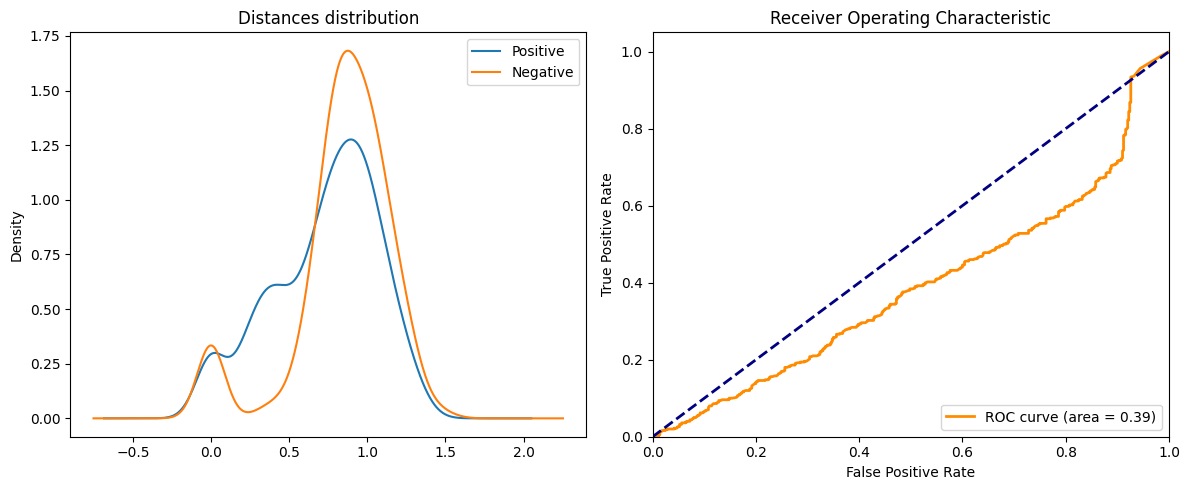

Target FAR: 1e-03 | Threshold: inf
Accuracy: 0.5000
VAL: 0.0000

Positive mean: 0.7271 ± 0.3368
Negative mean: 0.8509 ± 0.3063


In [4]:
val, acc = evaluate(model, eval_dataloader, 1e-3, 'cuda', output=True)

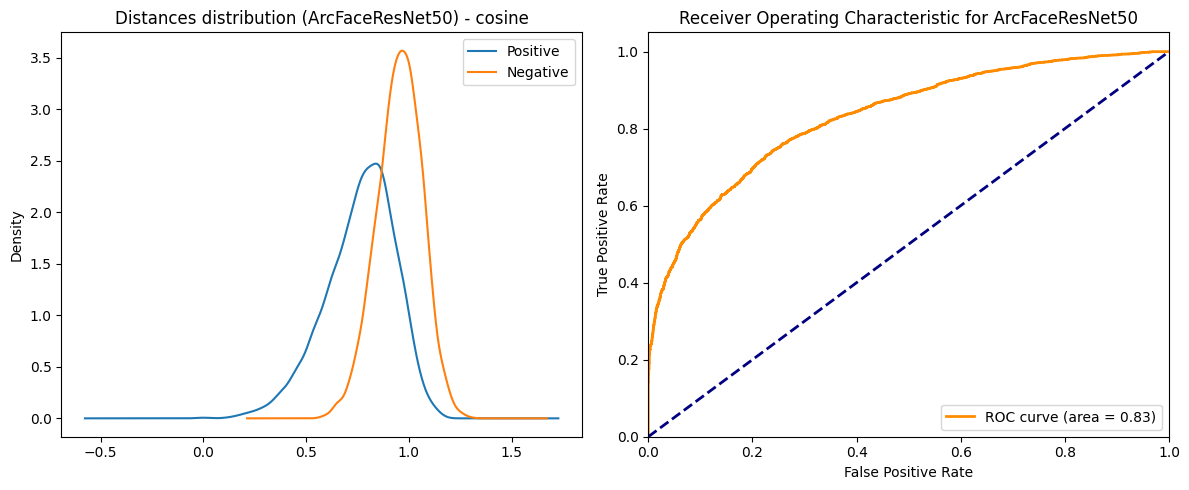

Target FAR: 1e-03 | Threshold: 0.6072
[ArcFaceResNet50] Accuracy: 0.5869
[ArcFaceResNet50] VAL: 0.1748

[ArcFaceResNet50] Positive mean: 0.7624 ± 0.1691
[ArcFaceResNet50] Negative mean: 0.9534 ± 0.1092


In [4]:
eval_epoch(
    model=model, 
    val_df=val_df, 
    transform=transform, 
    n_pairs=8192,
    batch_size=128,
    device=device, 
    target_far=1e-3, # 1e-3 = 0.1%
    metric='cosine'
)